In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels as sm

In [320]:
data = pd.read_csv('IPO.csv',parse_dates=['Listing Date'])

In [321]:
data= data.drop(['Year', 'Issuer Company'], axis=1)

In [322]:
data.head()

Listing Date  Issue Price  Issue Size   QIB   NII   RII   EMP  Total  \
0   2019-03-29          120      212.04  1.13  2.15  2.95  1.54   1.46   
1   2019-02-07          280     1641.18  4.66  1.10  0.03   NaN   1.57   
2   2019-02-04           66       23.00  1.24  7.69  2.64   NaN   3.25   
3   2018-10-10          118      344.69  1.81  0.31  0.24  0.14   1.02   
4   2018-10-08          821     1734.07  2.77  0.26  0.25   NaN   0.97   

   Open Price  Low Price  High Price  Close Price  Change  
0       111.0     110.05      116.55       114.20   -4.83  
1       291.0     250.15      295.30       290.40    3.71  
2        57.0      55.15       59.85        59.85   -9.32  
3       104.0      95.35      109.50       105.10  -10.93  
4       758.0     710.00      787.50       773.15   -5.83

In [323]:
data['Month'] = pd.DatetimeIndex(data['Listing Date']).month

In [324]:
data.drop(['Listing Date'], axis=1, inplace=True)

In [325]:
data.columns.values

array(['Issue Price', 'Issue Size', 'QIB', 'NII', 'RII', 'EMP', 'Total',
       'Open Price', 'Low Price', 'High Price', 'Close Price', 'Change',
       'Month'], dtype=object)

In [326]:
col = ['Month', 'Issue Price', 'Issue Size', 'QIB', 'NII', 'RII', 'EMP', 'Total',
       'Open Price', 'Low Price', 'High Price', 'Close Price', 'Change']    

In [327]:
data= data[col]

In [328]:
data.tail()

Month  Issue Price  Issue Size    QIB    NII    RII   EMP  Total  \
395      1          100       84.44  15.31  29.79  14.48  0.89  16.26   
396      1          265      378.86  57.06  41.58  11.09   NaN  38.65   
397     12           39       25.00    NaN    NaN    NaN   NaN    NaN   
398     12          150       59.35    NaN    NaN    NaN   NaN    NaN   
399     12          225      156.60    NaN    NaN    NaN   NaN    NaN   

     Open Price  Low Price  High Price  Close Price  Change  
395       135.0     125.00      163.85       158.20   58.20  
396       379.8     365.00      379.80       379.80   43.32  
397        40.0      40.00      135.70       128.80  230.26  
398       177.1     134.10      177.10       136.00   -9.33  
399       260.0     235.25      261.90       238.45    5.98

In [329]:
data.isnull().sum()

Month            0
Issue Price      0
Issue Size       0
QIB             34
NII             27
RII             27
EMP            241
Total           25
Open Price       0
Low Price        0
High Price       0
Close Price      0
Change           0
dtype: int64

In [330]:
data.drop(['EMP'],axis=1,inplace=True)

In [331]:
data.dropna(inplace=True)

In [332]:
data.isnull().sum()

Month          0
Issue Price    0
Issue Size     0
QIB            0
NII            0
RII            0
Total          0
Open Price     0
Low Price      0
High Price     0
Close Price    0
Change         0
dtype: int64

In [333]:
data.describe()

Month  Issue Price    Issue Size          QIB         NII  \
count  364.000000   364.000000    364.000000   364.000000  364.000000   
mean     6.475275   277.642857    733.712363    52.549121   50.107665   
std      3.395337   272.702613   1659.343851   524.248921  103.509901   
min      1.000000    10.000000     14.000000     0.010000    0.030000   
25%      3.000000   100.000000     80.992500     1.325000    1.840000   
50%      7.000000   180.500000    214.180000     5.665000    5.535000   
75%      9.000000   362.500000    619.310000    35.492500   49.112500   
max     12.000000  1766.000000  15199.440000  9999.000000  958.070000   

              RII       Total   Open Price    Low Price   High Price  \
count  364.000000  364.000000   364.000000   364.000000   364.000000   
mean     8.233352   23.441181   316.357830   295.557692   355.550275   
std     13.636770   38.976427   329.057191   321.526758   358.140120   
min      0.030000    0.440000     9.500000     7.950000     9.500000   
25%      1.180000    1.730000   104.000000    89.825000   119.275000   
50%      3.160000    5.040000   200.000000   178.475000   224.700000   
75%      9.025000   30.892500   411.612500   386.500000   473.237500   
max    123.800000  273.050000  2725.000000  2725.000000  3020.250000   

       Close Price      Change  
count   364.000000  364.000000  
mean    326.679341   16.974615  
std     343.369547   39.424123  
min       8.300000  -63.780000  
25%     100.862500   -6.505000  
50%     205.500000    6.225000  
75%     439.762500   31.290000  
max    2892.800000  241.750000

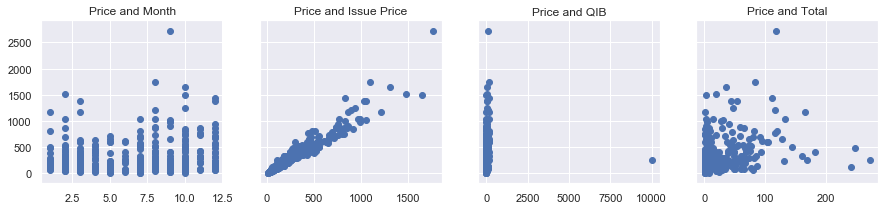

In [334]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize=(15,3))
ax1.scatter(data['Month'],data['Open Price'])
ax1.set_title('Price and Month')
ax2.scatter(data['Issue Price'],data['Open Price'])
ax2.set_title('Price and Issue Price')
ax3.scatter(data['QIB'],data['Open Price'])
ax3.set_title('Price and QIB')
ax4.scatter(data['Total'],data['Open Price'])
ax4.set_title('Price and Total')

plt.show()

In [335]:
q = data['Total'].quantile(0.99)
q

174.92190000000005

In [336]:
q = data['Open Price'].quantile(0.99)
q

1507.4

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

VIF     features
0     2.386352        Month
1    46.439592  Issue Price
2     1.373904   Issue Size
3     1.351065          QIB
4     7.339857          NII
5     4.012424          RII
6    14.136101        Total
7   604.791434   Open Price
8   622.319586    Low Price
9   584.767785   High Price
10  808.823795  Close Price
11    4.278635       Change

In [338]:
data.drop(['NII', 'Low Price', 'High Price'], axis=1, inplace=True)

In [339]:
data.drop(['Close Price'], axis=1, inplace=True)

In [340]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

VIF     features
0   2.317926        Month
1  42.810112  Issue Price
2   1.344406   Issue Size
3   1.247294          QIB
4   3.285087          RII
5   4.118780        Total
6  44.813761   Open Price
7   2.164058       Change

In [341]:
data.drop(['Change'], axis=1, inplace=True)

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

VIF     features
0   2.293437        Month
1  40.281974  Issue Price
2   1.343697   Issue Size
3   1.245504          QIB
4   2.710067          RII
5   4.109226        Total
6  42.230274   Open Price

In [343]:
y = data['Open Price']
x = data.drop(['Open Price'],axis=1)

In [344]:
x.head()

Month  Issue Price  Issue Size   QIB   RII  Total
0      3          120      212.04  1.13  2.95   1.46
1      2          280     1641.18  4.66  0.03   1.57
2      2           66       23.00  1.24  2.64   3.25
3     10          118      344.69  1.81  0.24   1.02
4     10          821     1734.07  2.77  0.25   0.97

In [345]:
y.head()

0    111.0
1    291.0
2     57.0
3    104.0
4    758.0
Name: Open Price, dtype: float64

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [347]:
scaler = StandardScaler()

In [348]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [349]:
x_scaled = scaler.transform(x)

Train Test split

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=365)

In [352]:
reg = LinearRegression()

In [353]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [354]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [355]:
reg_summary

Features   Weights
0        Month  0.865254
1  Issue Price  1.137450
2   Issue Size -0.006733
3          QIB  1.218917
4          RII  0.486159
5        Total  0.148580

In [364]:
y_hat_test = reg.predict(x_test)

In [357]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])

In [358]:
y_test.reset_index(drop=True, inplace=True)
df_pf['Targets'] = y_test

In [359]:
df_pf.to_csv('Test.csv')

(0, 1400)

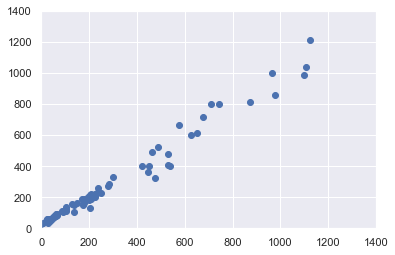

In [360]:
plt.scatter(df_pf['Prediction'],df_pf['Targets'])
plt.xlim(0,1400)
plt.ylim(0,1400)

In [361]:
reg.score(x_train,y_train)

0.9635103300610116

In [372]:
y_final = reg.predict(x)

In [375]:
df_pf_final=pd.DataFrame(y_final, columns=['Prediction'])
df_pf_final['Targets'] = y

In [384]:
y.reset_index(drop=True, inplace=True)

In [385]:
df_pf_final['Targets'] = y

In [386]:
df_pf_final

Prediction  Targets
0     102.472410   111.00
1     276.876836   291.00
2      41.706925    57.00
3     104.807203   104.00
4     896.247912   758.00
5     527.818541   410.30
6     448.573023   385.00
7    1450.918925  1739.00
8     792.149120   715.00
9    1066.739918  1032.00
10    279.414041   190.00
11    871.965560   815.00
12    625.471499   600.00
13     26.911504    61.60
14     67.580730    87.00
15    531.488288   431.10
16    172.705071   136.00
17    358.291637   345.00
18   1320.924231  1169.00
19    410.632525   485.00
20    447.422533   360.00
21    280.818174   270.00
22    176.356893   182.10
23   1712.623412  1520.00
24   1179.172286  1180.00
25    261.247026   253.00
26    455.102048   478.00
27    226.100661   114.00
28    740.841048   674.00
29    258.011617   237.00
..           ...      ...
334    79.603211    94.00
335   376.544866   341.90
336   260.376054   275.00
337    79.025344    90.05
338    76.925532    94.80
339   157.949829   151.00
340   140.521534    92.40
341   159.212390   160.00
342   103.958291   117.00
343   667.498190   599.00
344   103.923902   110.00
345    20.068250    42.00
346   137.751769   105.00
347   400.906619   349.90
348   335.612596   350.00
349    25.078956    60.00
350   236.308846   104.00
351   134.488239    75.10
352   175.367535   140.00
353   596.082375   500.00
354   226.804701   175.00
355   102.065396   125.00
356     3.282910    45.00
357   318.176796   417.10
358   737.324284   701.35
359   246.524790   261.15
360   154.568379   189.90
361   111.489681   140.00
362   103.940630   135.00
363   342.206075   379.80

[364 rows x 2 columns]

In [388]:
df_pf_final.to_csv('final test result.csv')